In [1]:
import torchaudio
import torchaudio.transforms as transforms
import torch
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [8]:
songs = [
    "C:/Users/himan/Desktop/MTECH CSE 2025 SEMESTER 2/SU/Assignment_1/code/songs/heavymetal.mp3",
    "C:/Users/himan/Desktop/MTECH CSE 2025 SEMESTER 2/SU/Assignment_1/code/songs/jazz.mp3",
    "C:/Users/himan/Desktop/MTECH CSE 2025 SEMESTER 2/SU/Assignment_1/code/songs/pop.mp3",
    "C:/Users/himan/Desktop/MTECH CSE 2025 SEMESTER 2/SU/Assignment_1/code/songs/rock.mp3"
]

In [9]:
def plot_spectrogram(waveform, sample_rate, title="Spectrogram"):
    # Compute STFT
    spectrogram = torch.stft(waveform, n_fft=1024, hop_length=512, win_length=1024, return_complex=True)
    spectrogram = torch.abs(spectrogram)  # Magnitude
    
    # Convert to numpy for plotting
    spectrogram_np = spectrogram.numpy()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.imshow(10 * np.log10(spectrogram_np + 1e-6), aspect='auto', origin='lower')
    plt.colorbar(label='Magnitude (dB)')
    plt.title(title)
    plt.xlabel("Time Frame")
    plt.ylabel("Frequency Bin")
    plt.show()

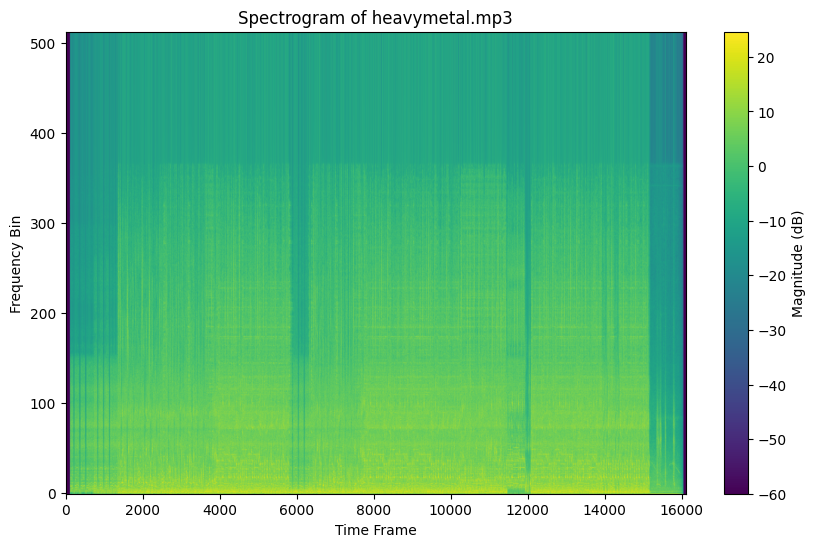

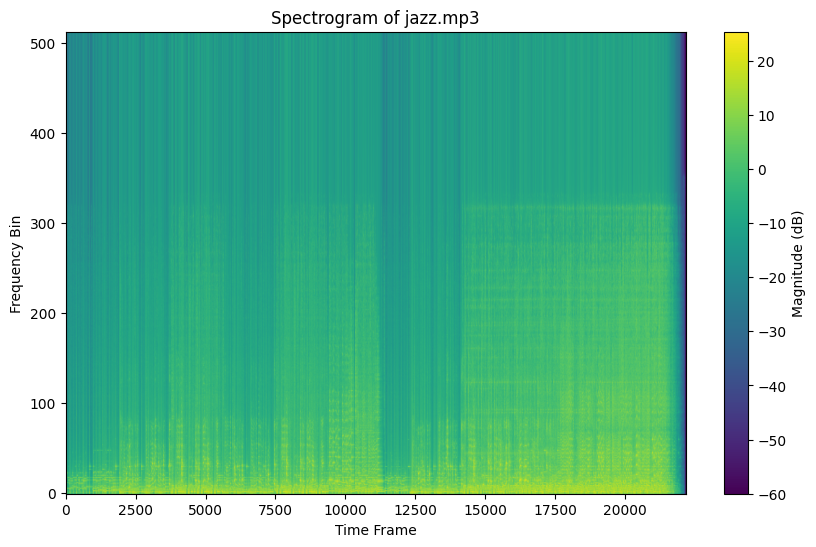

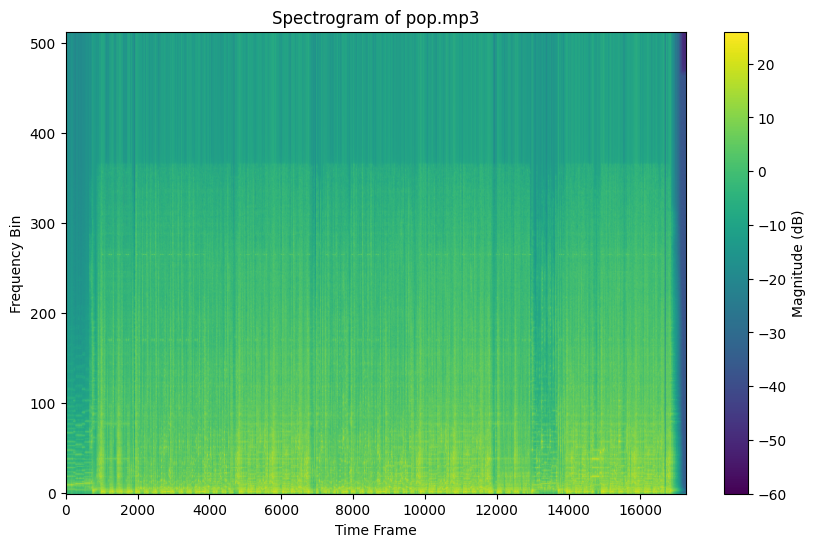

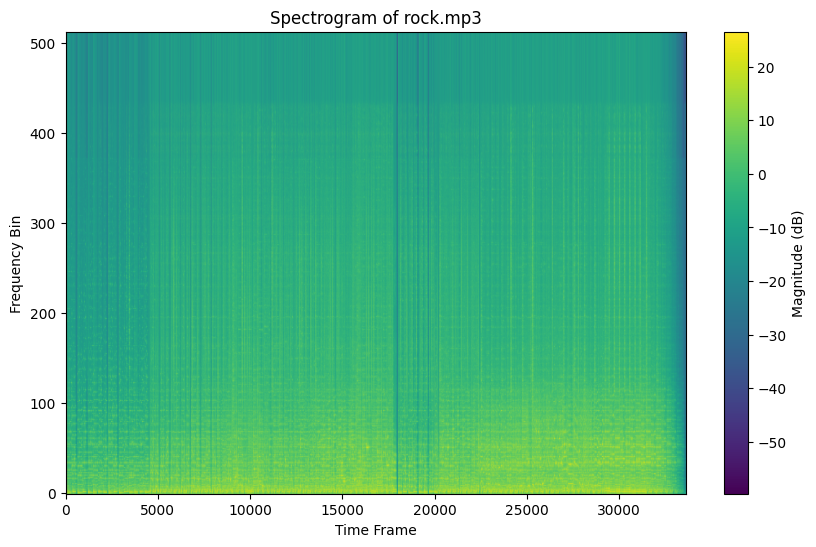

In [10]:
for song in songs:
    waveform, sample_rate = torchaudio.load(song)
    waveform = waveform.mean(dim=0)  # Convert to mono if stereo
    plot_spectrogram(waveform, sample_rate, title=f"Spectrogram of {song.split('/')[-1]}")